In [2]:
#어려운 수식말고 그냥 개념만 설명함
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### HoughLines() and HoughLinesP()

`cv2.HoughLines(image, rho, theta, threshold[, lines[, srn[, stn[, min_theta[, max_theta]]]]]) → lines`

Parameters:	
>- image – 8bit, single-channel binary image, canny edge를 선 적용.
>- rho – r 값의 범위 (0 ~ 1 실수)
>- theta – 𝜃 값의 범위(0 ~ 180 정수)
>- threshold – 만나는 점의 기준, 숫자가 작으면 많은 선이 검출되지만 정확도가 떨어지고, 숫자가 크면 정확도가 올라감.

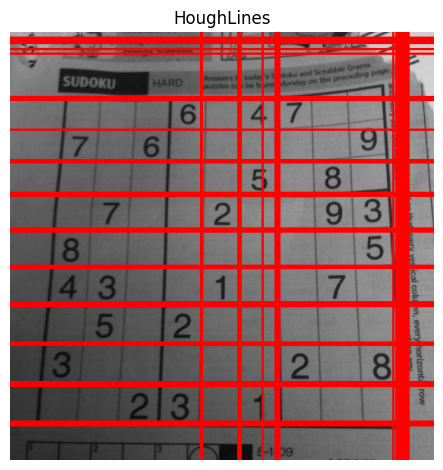

In [18]:
img = cv2.imread('../data/sudoku.png') 
grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

thr = cv2.Canny(grey,50,200)

lines = cv2.HoughLines(thr, 0.25, np.pi/36, 100) 

dbg1_img = cv2.cvtColor(grey,cv2.COLOR_GRAY2BGR)
if lines is not None:
    for line in lines:
        rho,theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(dbg1_img,(x1,y1),(x2,y2),(0,0,255),2)
        
plt.axis('off')
plt.title('HoughLines')
plt.imshow(dbg1_img[...,::-1])
plt.tight_layout()
plt.show()

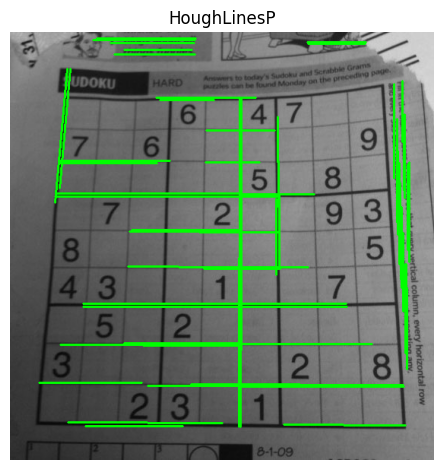

In [22]:
img = cv2.imread('../data/sudoku.png') 
grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

thr = cv2.Canny(grey,50,200)

lines1 = cv2.HoughLinesP(thr,0.5,np.pi/36,100,minLineLength=50,maxLineGap=10)

dbg_img = cv2.cvtColor(grey,cv2.COLOR_GRAY2BGR)
if lines1 is not None:
    for line in lines1:
        x1,y1,x2,y2 = line[0]
        cv2.line(dbg_img,(x1,y1),(x2,y2),(0,255,0),2)

plt.axis('off')
plt.title('HoughLinesP')
plt.imshow(dbg_img[...,::-1])
plt.tight_layout()
plt.show()


#### HoughCircles()
over binary image

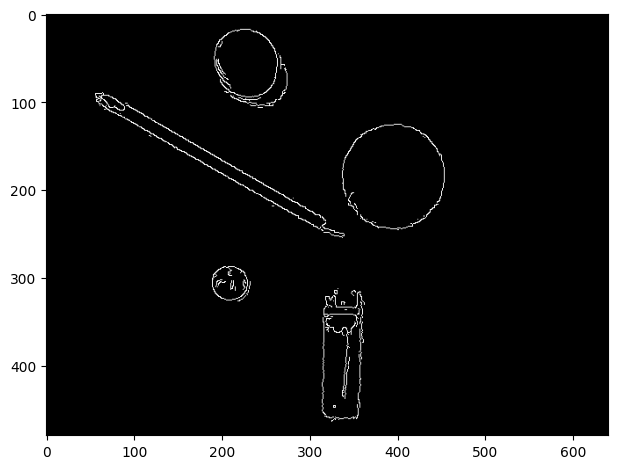

In [25]:
img = cv2.imread('../data/stuff.jpg')
grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

thr = cv2.Canny(grey,50,100)

plt.imshow(thr, cmap='gray')
plt.tight_layout()
plt.show()

(1, 3, 3)


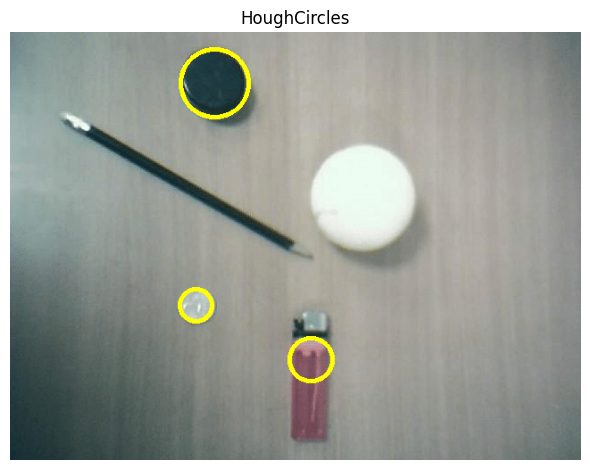

In [26]:
circles = cv2.HoughCircles(thr,cv2.HOUGH_GRADIENT,1,50, # dq, minDist
            param1=50,param2=30,minRadius=0, maxRadius=0)
print(circles.shape)

dbg_img = img.copy()
circles = circles[0,:,:].copy()
for i in range(len(circles)):
    x, y, r = list(circles[i, :])
    cv2.circle(dbg_img, (int(x), int(y)), int(r), (0, 255, 255), 3)

plt.axis('off')
plt.title('HoughCircles')
plt.imshow(dbg_img[...,::-1])
plt.tight_layout()
plt.show()

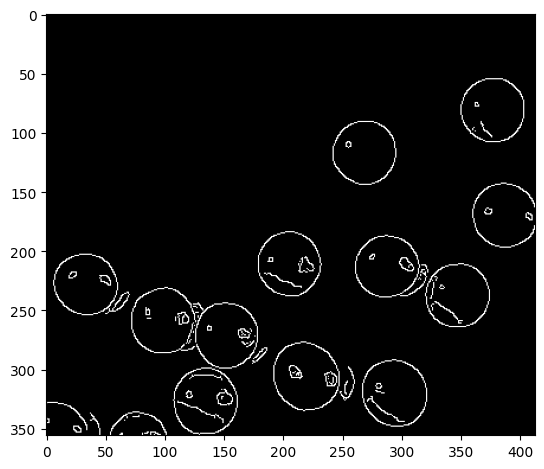

In [27]:
img = cv2.imread('../data/smarties.png') # water_coins.jpg,
grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thr = cv2.Canny(grey,50,100)
plt.imshow(thr, cmap='gray')
plt.tight_layout()
plt.show()

(1, 14, 3)


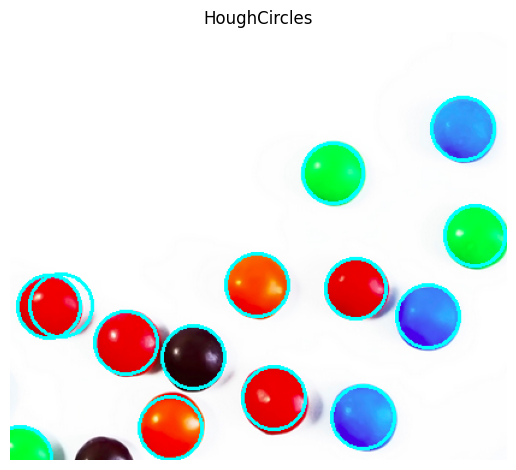

In [28]:
circles = cv2.HoughCircles(thr, cv2.HOUGH_GRADIENT, 1, 10, param1=50, param2=5, minRadius=25, maxRadius=25)

print(circles.shape)

dbg_img = img.copy()
circles = circles[0,:,:].copy()
for i in range(len(circles)):
    x, y, r = list(circles[i, :])
    cv2.circle(dbg_img, (int(x), int(y)), int(r), (255, 255, 0), 2)

plt.axis('off')
plt.title('HoughCircles')
plt.imshow(dbg_img[...,::-1])
plt.tight_layout()
plt.show()

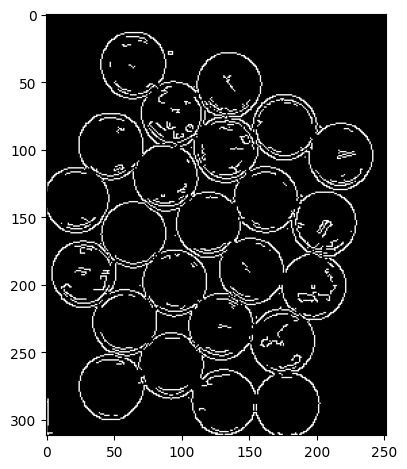

In [29]:
img = cv2.imread('../data/water_coins.jpg')
grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thr = cv2.Canny(grey,50,100)
plt.imshow(thr, cmap='gray')
plt.tight_layout()
plt.show()

(1, 26, 3)


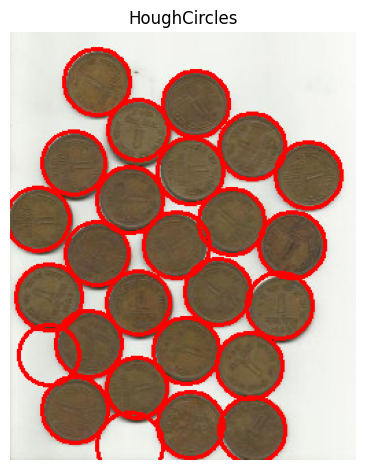

In [30]:
circles = cv2.HoughCircles(thr, cv2.HOUGH_GRADIENT, 1, 30, param1=50, param2=5, minRadius=20, maxRadius=25)

print(circles.shape)

dbg_img = img.copy()
circles = circles[0,:,:].copy()
for i in range(len(circles)):
    x, y, r = list(circles[i, :])
    cv2.circle(dbg_img, (int(x), int(y)), int(r), (0, 0, 255), 2)

plt.axis('off')
plt.title('HoughCircles')
plt.imshow(dbg_img[...,::-1])
plt.tight_layout()
plt.show()